<a href="https://colab.research.google.com/github/Giya67/supervised-learning-classification-/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Run this cell to install necessary libraries for this notebook
!pip install scikit-learn

# **Binary classification**

There are two types of supervised learning—classification and regression. Binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

The .head() of a dataset, churn_df, is shown below. You can expect the rest of the data to contain similar values.

| | account_length | total_day_charge | total_eve_charge | total_night_charge | total_intl_charge | customer_service_calls | churn |
| ----- | ----- | --------- | --------- | -------- | ------- | ---- | ---- |
| 0 |        101      |       45.85     |        17.65      |          9. |64        |       1.22     |   3    |  1  |  
|1 | 73        |      22.30       |       9.05            |     9.98     |          2.75  |         2 |           0   |
| 2    |          86    |         24.62    |         17.53      |         11. 49         |      3.13    |                   4   |   0 |
| 3         |     59        |     34.73      |       21.02       |         9.66     |          3.24     |                  1   |   0 |
| 4       |      129      |       27.42      |       18.75    |           10.11   |            2.59      |                 1   |   0 |


Looking at this data, which column could be the target variable for binary classification? Select one best answer and print the letter of your choice in the codecell below.

* A. "customer_service_calls"
* B. "total_night_charge"
* C. "churn"
* D. "account_length"

In [2]:
#Print either A, B, C or D as your choice of your answer here below.
print("C")

C


# **The supervised learning workflow**

Recall that scikit-learn offers a repeatable workflow for using supervised learning models to predict the target variable values when presented with new data.

Reorder the pseudo-code provided so it accurately represents the workflow of building a supervised learning model and making predictions. Then print the correct order in the codecell below.
* A. `model.predict(X_new)`
* B. `from sklearn.module import Model`
* C. `model = Model()`
* D. `model.fit(X, y)`


In [3]:
# print the correct workflow of building supervised learning model (as for example D, B, A, C)
print("B->C->D->A")

B->C->D->A


# **k-Nearest Neighbors: Fit**

In this exercise, you will build your first classification model using the `churn_df` dataset, which has been preloaded for you to use in the first few lines of code in the codecell below. The DataFrame is available for the remainder of the codecells we use in this notebook.

The target, `"churn"`, needs to be a single column with the same number of observations as the feature data. The feature data has already been converted into numpy arrays.

`"account_length"` and `"customer_service_calls"` are treated as features because account length indicates customer loyalty, and frequent customer service calls may signal dissatisfaction, both of which can be good predictors of churn.

**Instructions:**
* Import `KNeighborsClassifier` from `sklearn.neighbors`.
* Instantiate a `KNeighborsClassifier` called `knn` with` 6` neighbors.
* Fit the classifier to the data using the `.fit()` method.


In [38]:
#Import numpy
import pandas as pd
import numpy as np
#Loading churn_df from source dataset file
churn_df = pd.read_csv("https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/telecom_churn_clean.csv?raw=True")
print(churn_df.shape)
print(churn_df.head().to_string())
# Import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values


# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)
# Fit the classifier to the data
knn.fit(X, y)



(3333, 20)
   Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  customer_service_calls  churn
0           0             128        415                   0                1                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91               11.01                10.0                 3               2.70                       1      0
1           1             107        415                   0                1                     26              161.6              123             27.47              195.5              103             16.62                254.4                103               11.45       

KNeighborsClassifier(n_neighbors=6)

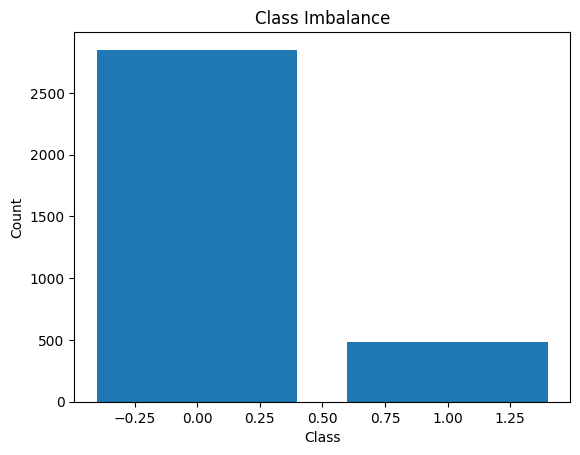

Class Percentages:
 churn
0    85.508551
1    14.491449
Name: count, dtype: float64


In [37]:
# to check class imbalance for exploratory data analysis
class_count = churn_df["churn"].value_counts()
plt.bar(class_count.index, class_count.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Imbalance")
plt.show()

# assess class imbalance and categorize it as mild, moderate, or severe with percentage

churn_df["churn"].value_counts(normalize=True)
class_percentages = class_count / len(churn_df) * 100
print("Class Percentages:\n", class_percentages)


# **k-Nearest Neighbors: Predict**

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as `X_new` in the first few lines of code in the codecell below.

The model `knn`, which you created and fit the data in the last exercise, is available to for you to use. You will use your classifier to predict the labels of a set of new data points:
```
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
```
Instructions:
* Create `y_pred` by predicting the target values of the unseen features `X_new` using the knn model.
* Print the predicted labels for the set of predictions.


In [28]:
#Initialize X_new
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))


Predictions: [1 1 0]


# **Train/test split + computing accuracy**

It's time to practice splitting your data into training and test sets with the `churn_df` dataset!

NumPy arrays have been created for you containing the features as `X `and the target variable as `y`.

**Instructions:**
* Import `train_test_split` from `sklearn.model_selection`.
* Split `X` and `y` into training and test sets, setting `test_size` equal to `20%`, `random_state` to `42`, and ensuring the target label proportions reflect that of the original dataset.
* Fit the `knn` model to the training data.
* Compute and print the model's accuracy for the test data.


In [29]:
# Import the module
from sklearn.model_selection import train_test_split


X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.8500749625187406


# **Overfitting and underfitting**

Interpreting model complexity is a great way to evaluate supervised learning performance. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

The training and test sets have been created from the `churn_df` dataset and preloaded as `X_train`, `X_test`, `y_train`, and `y_test`.

In addition, `KNeighborsClassifier` has been imported for you in the previous codecell and numpy is imported as np in the first few lines of code in the codecell below.

**Instructions:**
* Create `neighbors` as a numpy array of values from `1` up to and including `12`.
* Instantiate a `KNeighborsClassifier`, with the number of neighbors equal to the `neighbor` iterator.
* Fit the model to the training data.
* Calculate accuracy scores for the training set and test set separately using the `.score()` method, and assign the results to the `train_accuracies` and `test_accuracies` dictionaries, respectively, utilizing the neighbor iterator as the index.


In [7]:
#import numpy
import numpy as np

# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

	# Set up a KNN Classifier

	knn = KNeighborsClassifier(n_neighbors=neighbor)
	# Fit the model
	knn.fit(X_train, y_train)

	# Compute accuracy

	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8893473368342085, 3: 0.8975993998499625, 4: 0.8758439609902475, 5: 0.8844711177794449, 6: 0.8702175543885972, 7: 0.8747186796699175, 8: 0.8657164291072769, 9: 0.8672168042010503, 10: 0.8615903975993998, 11: 0.8657164291072769, 12: 0.8604651162790697} 
 {1: 0.7766116941529235, 2: 0.848575712143928, 3: 0.8350824587706147, 4: 0.8530734632683659, 5: 0.8500749625187406, 6: 0.856071964017991, 7: 0.8575712143928036, 8: 0.8575712143928036, 9: 0.856071964017991, 10: 0.856071964017991, 11: 0.856071964017991, 12: 0.8575712143928036}


# **Visualizing model complexity**

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of `n_neighbors`, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, `train_accuracies`, and `test_accuracies`, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

**Instructions:**
* Add a title `"KNN: Varying Number of Neighbors"`.
* Plot the `.values()` method of `train_accuracies` on the y-axis against `neighbors` on the x-axis, with a label of `"Training Accuracy"`.
* Plot the `.values()` method of `test_accuracies` on the y-axis against `neighbors` on the x-axis, with a label of `"Testing Accuracy"`.
* Display the plot.


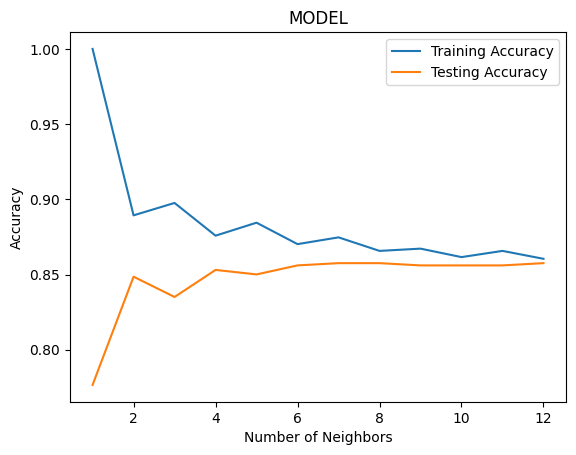

In [30]:
#Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Add a title

plt.title("MODEL")

# Plot training accuracies


plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies

plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")


plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot

plt.show()

In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://github.com/RyanNolanData/YouTubeData/blob/main/500hits.csv?raw=true",encoding='latin-1')
print(df.head().to_string())

         PLAYER  YRS     G     AB     R     H   2B   3B   HR   RBI    BB    SO   SB   CS     BA  HOF
0       Ty Cobb   24  3035  11434  2246  4189  724  295  117   726  1249   357  892  178  0.366    1
1   Stan Musial   22  3026  10972  1949  3630  725  177  475  1951  1599   696   78   31  0.331    1
2  Tris Speaker   22  2789  10195  1882  3514  792  222  117   724  1381   220  432  129  0.345    1
3   Derek Jeter   20  2747  11195  1923  3465  544   66  260  1311  1082  1840  358   97  0.310    1
4  Honus Wagner   21  2792  10430  1736  3430  640  252  101     0   963   327  722   15  0.329    1


In [24]:
# df = df.drop(columns=['PLAYER','CS'])
null =  pd.isnull(df)
pd.isnull(df).sum().sum()
print(null.head().to_string())


   PLAYER    YRS      G     AB      R      H     2B     3B     HR    RBI     BB     SO     SB     CS     BA    HOF
0   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False
1   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False
2   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False
3   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False
4   False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False


      YRS     G    AB     R     H    2B    3B    HR   RBI    BB    SO    SB  \
0    True  True  True  True  True  True  True  True  True  True  True  True   
1    True  True  True  True  True  True  True  True  True  True  True  True   
2    True  True  True  True  True  True  True  True  True  True  True  True   
3    True  True  True  True  True  True  True  True  True  True  True  True   
4    True  True  True  True  True  True  True  True  True  True  True  True   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
460  True  True  True  True  True  True  True  True  True  True  True  True   
461  True  True  True  True  True  True  True  True  True  True  True  True   
462  True  True  True  True  True  True  True  True  True  True  True  True   
463  True  True  True  True  True  True  True  True  True  True  True  True   
464  True  True  True  True  True  True  True  True  True  True  True  True   

       BA   HOF  
0    True  True  
1    True  True

AttributeError: 'NoneType' object has no attribute 'to_string'